## Analysis of Supremacy vs Goals Distribution
----------------------------------------------
#### How does supremacy relate to fav/dog goals distribution and latterly how does dnb price relate to match supremacy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])
df.head(5)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HST,AST,HF,AF,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,21/08/2021,Inter,Genoa,4.0,0.0,8.0,5.0,18.0,7.0,...,0.0,0.71,0.19,0.11,0.58,0.42,3.03,2.44,0.62,1.82
1,I1,21/08/2021,Verona,Sassuolo,2.0,3.0,4.0,8.0,11.0,12.0,...,1.0,0.37,0.28,0.36,0.52,0.48,2.76,1.41,1.38,0.03
2,I1,21/08/2021,Empoli,Lazio,1.0,3.0,5.0,5.0,13.0,10.0,...,0.0,0.20,0.24,0.55,0.56,0.44,2.94,0.94,1.97,-1.03
3,I1,21/08/2021,Torino,Atalanta,1.0,2.0,8.0,2.0,17.0,13.0,...,0.0,0.18,0.23,0.60,0.61,0.39,3.14,0.93,2.25,-1.32
4,I1,22/08/2021,Bologna,Salernitana,3.0,2.0,7.0,4.0,13.0,15.0,...,3.0,0.58,0.24,0.19,0.53,0.47,2.79,1.95,0.86,1.09


In [3]:
df.shape

(145313, 31)

In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HST', 'AST',
       'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'TG', 'TST', 'TF', 'TC',
       'TY', 'TR', 'HW_%', 'X_%', 'AW_%', 'Ov2.5_%', 'Un2.5_%', 'Exp',
       'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [5]:
# Compare Expected goals with actual goals
dfgls = df[['TG','Exp']]
dfgls.corr()

,TG,Exp
TG,1.000000,0.188652
Exp,0.188652,1.000000


In [6]:
# add dnb %
df['dnb_H'] = df['HW_%'] / (df['HW_%'] + (df['AW_%']))
df['dnb_A'] = df['AW_%'] / (df['HW_%'] + (df['AW_%']))


<AxesSubplot:xlabel='Exp', ylabel='TG'>

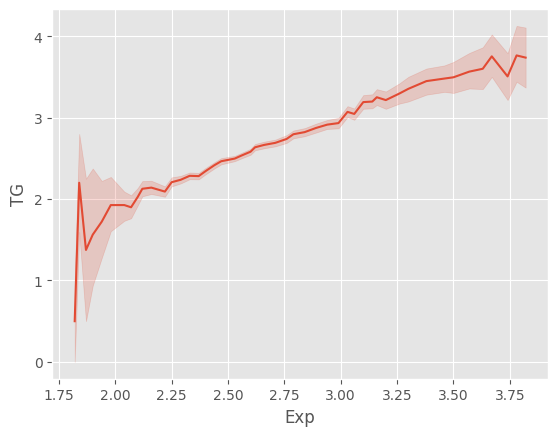

In [7]:
sns.lineplot(data = dfgls,x='Exp',y='TG')

In [8]:
#Isolate Required Columns
df = df[['Sup Exp','FTHG','FTAG','TG','HG_Exp','AG_Exp', 'Exp', 'dnb_H','dnb_A']]
df.head()

,Sup Exp,FTHG,FTAG,TG,HG_Exp,AG_Exp,Exp,dnb_H,dnb_A
0,1.82,4.0,0.0,4.0,2.44,0.62,3.03,0.865854,0.134146
1,0.03,2.0,3.0,5.0,1.41,1.38,2.76,0.506849,0.493151
2,-1.03,1.0,3.0,4.0,0.94,1.97,2.94,0.266667,0.733333
3,-1.32,1.0,2.0,3.0,0.93,2.25,3.14,0.230769,0.769231
4,1.09,3.0,2.0,5.0,1.95,0.86,2.79,0.753247,0.246753


In [9]:
df.dropna(inplace=True)
df

,Sup Exp,FTHG,FTAG,TG,HG_Exp,AG_Exp,Exp,dnb_H,dnb_A
0,1.82,4.0,0.0,4.0,2.44,0.62,3.03,0.865854,0.134146
1,0.03,2.0,3.0,5.0,1.41,1.38,2.76,0.506849,0.493151
2,-1.03,1.0,3.0,4.0,0.94,1.97,2.94,0.266667,0.733333
3,-1.32,1.0,2.0,3.0,0.93,2.25,3.14,0.230769,0.769231
4,1.09,3.0,2.0,5.0,1.95,0.86,2.79,0.753247,0.246753
...,...,...,...,...,...,...,...,...,...
143652,-0.23,2.0,3.0,5.0,1.15,1.38,2.53,0.438356,0.561644
143653,0.64,0.0,2.0,2.0,1.60,0.96,2.56,0.671233,0.328767
143654,-0.21,1.0,2.0,3.0,1.16,1.37,2.53,0.444444,0.555556
143655,0.26,0.0,0.0,0.0,1.43,1.17,2.62,0.569444,0.430556


In [10]:
df.describe()

,Sup Exp,FTHG,FTAG,TG,HG_Exp,AG_Exp,Exp,dnb_H,dnb_A
count,121847.000000,121847.000000,121847.000000,121847.000000,121847.000000,121847.000000,121847.000000,121847.000000,121847.000000
mean,0.384118,1.468653,1.144082,2.612736,1.508868,1.124750,2.633687,0.594335,0.405665
std,0.773549,1.240561,1.111854,1.635897,0.438589,0.384647,0.286418,0.171295,0.171295
min,-3.160000,0.000000,0.000000,0.000000,0.220000,0.240000,1.820000,0.032258,0.032258
25%,0.000000,1.000000,0.000000,1.000000,1.240000,0.880000,2.440000,0.500000,0.287671
50%,0.360000,1.000000,1.000000,2.000000,1.440000,1.070000,2.600000,0.602941,0.397059
75%,0.800000,2.000000,2.000000,4.000000,1.710000,1.300000,2.790000,0.712329,0.500000
max,3.320000,10.000000,13.000000,13.000000,3.570000,3.400000,3.820000,0.967742,0.967742


#### bucket the data into groups of sup levels

In [11]:
df1 = df[df['Sup Exp']>=2.4]
a1 = round(df1['Sup Exp'].mean(),2)
b1 = round(df1['FTHG'].mean(),2)
c1 = round(df1['FTAG'].mean(),2)
d1 = round(df1['TG'].mean(),2)
print('Avg Sup for all matches Sup >= 2.4: ',a1)
print('Avg HG: ',b1)
print('Avg AG: ',c1)
print('Avg TG: ',d1)

Avg Sup for all matches Sup >= 2.4:  2.67
Avg HG:  2.94
Avg AG:  0.61
Avg TG:  3.55


In [12]:

df2 = df[(df['Sup Exp']>=2) & (df['Sup Exp']<2.4)]
a2 = round(df2['Sup Exp'].mean(),2)
b2 = round(df2['FTHG'].mean(),2)
c2 = round(df2['FTAG'].mean(),2)
d2 = round(df2['TG'].mean(),2)
print('Avg Sup for all matches 2 <= Sup > 2.4: ',a2)
print('Avg HG: ',b2)
print('Avg AG: ',c2)
print('Avg TG: ',d2)

Avg Sup for all matches 2 <= Sup > 2.4:  2.18
Avg HG:  2.52
Avg AG:  0.66
Avg TG:  3.18


In [13]:
df3 = df[(df['Sup Exp']>=1.7) & (df['Sup Exp']<2)]
a3 = round(df3['Sup Exp'].mean(),2)
b3 = round(df3['FTHG'].mean(),2)
c3 = round(df3['FTAG'].mean(),2)
d3 = round(df3['TG'].mean(),2)
print('Avg Sup for all matches 1.7 <= Sup > 2: ',a3)
print('Avg HG: ',b3)
print('Avg AG: ',c3)
print('Avg TG: ',d3)

Avg Sup for all matches 1.7 <= Sup > 2:  1.83
Avg HG:  2.32
Avg AG:  0.72
Avg TG:  3.04


In [14]:
df4 = df[(df['Sup Exp']>=1.4) & (df['Sup Exp']<1.7)]
a4 = round(df4['Sup Exp'].mean(),2)
b4 = round(df4['FTHG'].mean(),2)
c4 = round(df4['FTAG'].mean(),2)
d4 = round(df4['TG'].mean(),2)
print('Avg Sup for all matches 1.4 <= Sup > 2.4: ',a4)
print('Avg HG: ',b4)
print('Avg AG: ',c4)
print('Avg TG: ',d4)

Avg Sup for all matches 1.4 <= Sup > 2.4:  1.54
Avg HG:  2.14
Avg AG:  0.8
Avg TG:  2.94


In [15]:
df5 = df[(df['Sup Exp']>=1.1) & (df['Sup Exp']<1.4)]
a5 = round(df5['Sup Exp'].mean(),2)
b5 = round(df5['FTHG'].mean(),2)
c5 = round(df5['FTAG'].mean(),2)
d5 = round(df5['TG'].mean(),2)
print('Avg Sup for all matches <= 1.1 Sup > 2.4: ',a5)
print('Avg HG: ',b5)
print('Avg AG: ',c5)
print('Avg TG: ',d5)

Avg Sup for all matches <= 1.1 Sup > 2.4:  1.23
Avg HG:  1.9
Avg AG:  0.87
Avg TG:  2.77


In [16]:
df6 = df[(df['Sup Exp']>=0.7) & (df['Sup Exp']<1.1)]
a6 = round(df6['Sup Exp'].mean(),2)
b6 = round(df6['FTHG'].mean(),2)
c6 = round(df6['FTAG'].mean(),2)
d6 = round(df6['TG'].mean(),2)
print('Avg Sup for all matches 0.7 <= Sup > 1.1: ',a6)
print('Avg HG: ',b6)
print('Avg AG: ',c6)
print('Avg TG: ',d6)

Avg Sup for all matches 0.7 <= Sup > 1.1:  0.87
Avg HG:  1.68
Avg AG:  0.95
Avg TG:  2.63


In [17]:
df7 = df[(df['Sup Exp']>=0.3) & (df['Sup Exp']<0.7)]
a7 = round(df7['Sup Exp'].mean(),2)
b7 = round(df7['FTHG'].mean(),2)
c7 = round(df7['FTAG'].mean(),2)
d7 = round(df7['TG'].mean(),2)
print('Avg Sup for all matches 0.3 <= Sup > 0.7: ',a7)
print('Avg HG: ',b7)
print('Avg AG: ',c7)
print('Avg TG: ',d7)

Avg Sup for all matches 0.3 <= Sup > 0.7:  0.48
Avg HG:  1.44
Avg AG:  1.03
Avg TG:  2.48


In [18]:
df8 = df[(df['Sup Exp']>=0) & (df['Sup Exp']<0.3)]
a8 = round(df8['Sup Exp'].mean(),2)
b8 = round(df8['FTHG'].mean(),2)
c8 = round(df8['FTAG'].mean(),2)
d8 = round(df8['TG'].mean(),2)
print('Avg Sup for all matches Sup >= 2.4: ',a8)
print('Avg HG: ',b8)
print('Avg AG: ',c8)
print('Avg TG: ',d8)

Avg Sup for all matches Sup >= 2.4:  0.15
Avg HG:  1.3
Avg AG:  1.17
Avg TG:  2.47


#### Now create a df with these groups

In [19]:
# new df with the above outputs
data = [[a1,b1,c1,d1],[a2,b2,c2,d2],[a3,b3,c3,d3],[a4,b4,c4,d4],[a5,b5,c5,d5],[a6,b6,c6,d6],[a7,b7,c7,d7],[a8,b8,c8,d8]]
dfcomb = pd.DataFrame(data, columns=['Sup','HG','AG','TG'])
dfcomb

,Sup,HG,AG,TG
0,2.67,2.94,0.61,3.55
1,2.18,2.52,0.66,3.18
2,1.83,2.32,0.72,3.04
3,1.54,2.14,0.80,2.94
4,1.23,1.90,0.87,2.77
5,0.87,1.68,0.95,2.63
6,0.48,1.44,1.03,2.48
7,0.15,1.30,1.17,2.47


#### Visualize the relationships

<AxesSubplot:xlabel='Sup', ylabel='TG'>

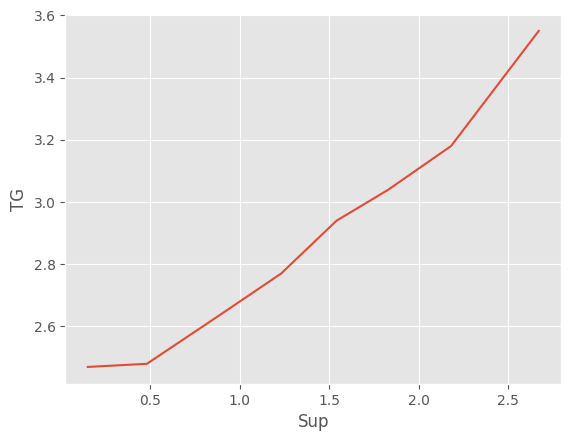

In [20]:
sns.lineplot(data = dfcomb,x='Sup',y='TG')

<AxesSubplot:xlabel='Sup', ylabel='HG'>

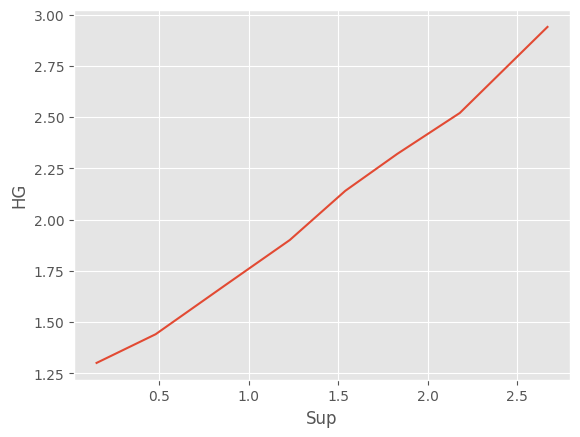

In [21]:
sns.lineplot(data = dfcomb,x='Sup',y='HG')


<AxesSubplot:xlabel='Sup', ylabel='AG'>

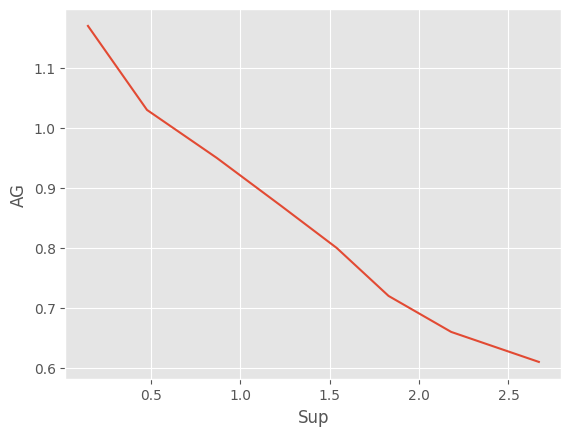

In [22]:
sns.lineplot(data = dfcomb,x='Sup',y='AG')

#### Do the same plots but this time with trend line formulae

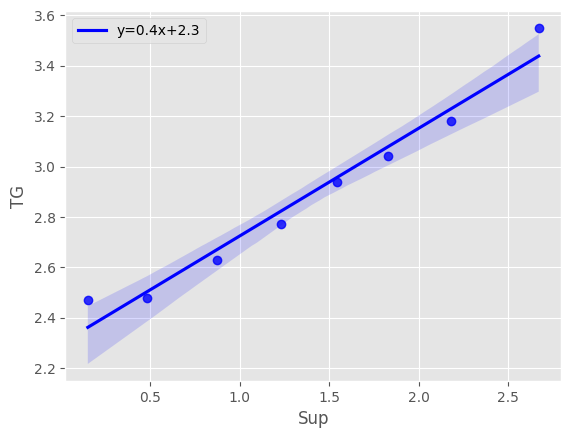

In [23]:
from scipy import stats

# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb['Sup'],dfcomb['TG'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Sup", y="TG", data=dfcomb, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

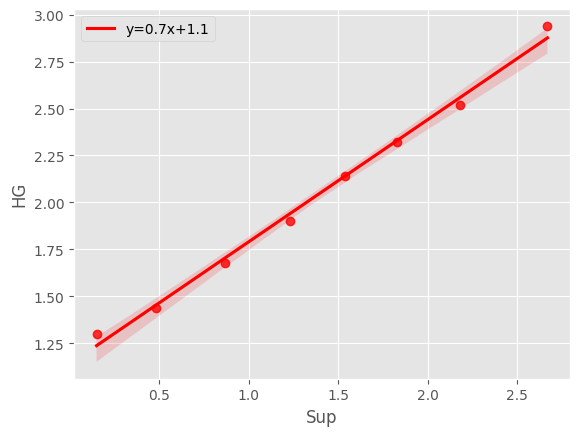

In [24]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb['Sup'],dfcomb['HG'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Sup", y="HG", data=dfcomb, color='r', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

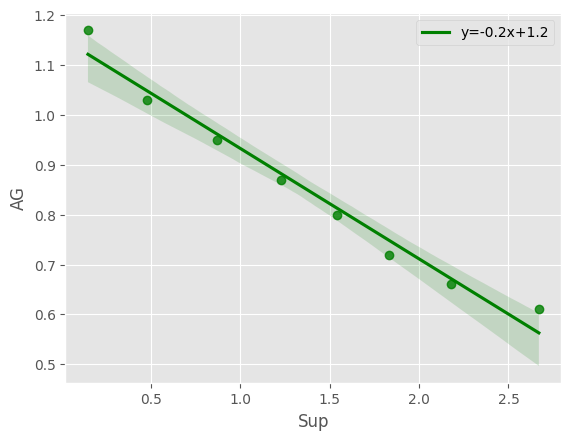

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb['Sup'],dfcomb['AG'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Sup", y="AG", data=dfcomb, color='g', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

More info about fitted curved lines can be found here
https://rowannicholls.github.io/python/curve_fitting/exponential.html

#### Introduce a new column with '% of fav Gls' expected

In [26]:
#lets add another column with the % goals split between home and away given sup
dfcomb['% Fav Gls'] = round(dfcomb['HG'] / dfcomb['TG'],2)
dfcomb

,Sup,HG,AG,TG,% Fav Gls
0,2.67,2.94,0.61,3.55,0.83
1,2.18,2.52,0.66,3.18,0.79
2,1.83,2.32,0.72,3.04,0.76
3,1.54,2.14,0.80,2.94,0.73
4,1.23,1.90,0.87,2.77,0.69
5,0.87,1.68,0.95,2.63,0.64
6,0.48,1.44,1.03,2.48,0.58
7,0.15,1.30,1.17,2.47,0.53


#### Plot Sup vs '% fav Gls'

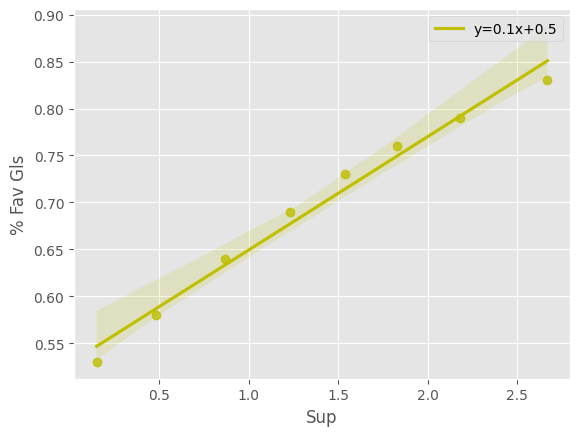

In [27]:
# Now lets plot the % split vs Sup
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb['Sup'],dfcomb['% Fav Gls'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Sup", y="% Fav Gls", data=dfcomb, color='y', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [28]:
df

,Sup Exp,FTHG,FTAG,TG,HG_Exp,AG_Exp,Exp,dnb_H,dnb_A
0,1.82,4.0,0.0,4.0,2.44,0.62,3.03,0.865854,0.134146
1,0.03,2.0,3.0,5.0,1.41,1.38,2.76,0.506849,0.493151
2,-1.03,1.0,3.0,4.0,0.94,1.97,2.94,0.266667,0.733333
3,-1.32,1.0,2.0,3.0,0.93,2.25,3.14,0.230769,0.769231
4,1.09,3.0,2.0,5.0,1.95,0.86,2.79,0.753247,0.246753
...,...,...,...,...,...,...,...,...,...
143652,-0.23,2.0,3.0,5.0,1.15,1.38,2.53,0.438356,0.561644
143653,0.64,0.0,2.0,2.0,1.60,0.96,2.56,0.671233,0.328767
143654,-0.21,1.0,2.0,3.0,1.16,1.37,2.53,0.444444,0.555556
143655,0.26,0.0,0.0,0.0,1.43,1.17,2.62,0.569444,0.430556


#### Create two new df's, one only consisting of away team favs, the other home team favs

In [29]:
# Merge home and away favs into one column
df_dogs = df[df['Sup Exp'] < 0]
df_dogs.rename(columns={'HG_Exp':'Dog_Exp','AG_Exp':'Fav_Exp', 'FTHG':'Dog_Gls','FTAG':'Fav_Gls','dnb_H':'dnb_dog','dnb_A':'dnb_fav'},inplace=True)
df_dogs = df_dogs[['Dog_Exp','Fav_Exp','Sup Exp','Exp','Dog_Gls', 'Fav_Gls','TG','dnb_fav','dnb_dog']]
df_dogs

C:\Users\MikeD\AppData\Local\Temp\ipykernel_8116\433125919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dogs.rename(columns={'HG_Exp':'Dog_Exp','AG_Exp':'Fav_Exp', 'FTHG':'Dog_Gls','FTAG':'Fav_Gls','dnb_H':'dnb_dog','dnb_A':'dnb_fav'},inplace=True)


,Dog_Exp,Fav_Exp,Sup Exp,Exp,Dog_Gls,Fav_Gls,TG,dnb_fav,dnb_dog
2,0.94,1.97,-1.03,2.94,1.0,3.0,4.0,0.733333,0.266667
3,0.93,2.25,-1.32,3.14,1.0,2.0,3.0,0.769231,0.230769
5,0.68,2.16,-1.48,2.84,2.0,2.0,4.0,0.833333,0.166667
9,1.05,1.74,-0.69,2.79,0.0,1.0,1.0,0.671233,0.328767
11,0.84,2.10,-1.26,2.94,1.0,3.0,4.0,0.779221,0.220779
...,...,...,...,...,...,...,...,...,...
143638,1.18,1.38,-0.20,2.56,1.0,1.0,2.0,0.555556,0.444444
143640,1.25,1.31,-0.06,2.56,2.0,0.0,2.0,0.513889,0.486111
143644,1.09,1.60,-0.51,2.66,0.0,2.0,2.0,0.630137,0.369863
143652,1.15,1.38,-0.23,2.53,2.0,3.0,5.0,0.561644,0.438356


In [30]:
df_favs = df[df['Sup Exp'] > 0]
df_favs.rename(columns={'HG_Exp':'Dog_Exp','AG_Exp':'Fav_Exp','FTAG':'Dog_Gls','FTHG':'Fav_Gls','dnb_H':'dnb_fav','dnb_A':'dnb_dog'},inplace=True)
df_favs = df_favs[['Dog_Exp','Fav_Exp','Sup Exp','Exp','TG', 'Dog_Gls','Fav_Gls','dnb_fav','dnb_dog']]
df_favs

C:\Users\MikeD\AppData\Local\Temp\ipykernel_8116\4135223037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_favs.rename(columns={'HG_Exp':'Dog_Exp','AG_Exp':'Fav_Exp','FTAG':'Dog_Gls','FTHG':'Fav_Gls','dnb_H':'dnb_fav','dnb_A':'dnb_dog'},inplace=True)


,Dog_Exp,Fav_Exp,Sup Exp,Exp,TG,Dog_Gls,Fav_Gls,dnb_fav,dnb_dog
0,2.44,0.62,1.82,3.03,4.0,0.0,4.0,0.865854,0.134146
1,1.41,1.38,0.03,2.76,5.0,3.0,2.0,0.506849,0.493151
4,1.95,0.86,1.09,2.79,5.0,2.0,3.0,0.753247,0.246753
6,2.86,0.52,2.34,3.38,2.0,0.0,2.0,0.905882,0.094118
7,1.99,1.00,0.99,2.99,4.0,1.0,3.0,0.720000,0.280000
...,...,...,...,...,...,...,...,...,...
143650,1.33,1.23,0.10,2.56,5.0,5.0,0.0,0.527778,0.472222
143651,1.44,1.09,0.35,2.53,4.0,2.0,2.0,0.597222,0.402778
143653,1.60,0.96,0.64,2.56,2.0,2.0,0.0,0.671233,0.328767
143655,1.43,1.17,0.26,2.62,0.0,0.0,0.0,0.569444,0.430556


#### Concatenate both df's so Favs and Dog features are ascribed

In [31]:
#concat both df's
df = pd.concat([df_favs,df_dogs])
df

,Dog_Exp,Fav_Exp,Sup Exp,Exp,TG,Dog_Gls,Fav_Gls,dnb_fav,dnb_dog
0,2.44,0.62,1.82,3.03,4.0,0.0,4.0,0.865854,0.134146
1,1.41,1.38,0.03,2.76,5.0,3.0,2.0,0.506849,0.493151
4,1.95,0.86,1.09,2.79,5.0,2.0,3.0,0.753247,0.246753
6,2.86,0.52,2.34,3.38,2.0,0.0,2.0,0.905882,0.094118
7,1.99,1.00,0.99,2.99,4.0,1.0,3.0,0.720000,0.280000
...,...,...,...,...,...,...,...,...,...
143638,1.18,1.38,-0.20,2.56,2.0,1.0,1.0,0.555556,0.444444
143640,1.25,1.31,-0.06,2.56,2.0,2.0,0.0,0.513889,0.486111
143644,1.09,1.60,-0.51,2.66,2.0,0.0,2.0,0.630137,0.369863
143652,1.15,1.38,-0.23,2.53,5.0,2.0,3.0,0.561644,0.438356


#### Again bucket the data based on Supremacy for ease of analysis and plotting

In [32]:
# bucket the data
df_1 = df[(df['Sup Exp']>=2.8)]
df_2 = df[(df['Sup Exp']>=2.5) & (df['Sup Exp']<2.8)]
df_3 = df[(df['Sup Exp']>=2.3) & (df['Sup Exp']<2.5)]
df_4 = df[(df['Sup Exp']>=2.1) & (df['Sup Exp']<2.3)]
df_5 = df[(df['Sup Exp']>=1.9) & (df['Sup Exp']<2.1)]
df_6 = df[(df['Sup Exp']>=1.7) & (df['Sup Exp']<1.9)]
df_7 = df[(df['Sup Exp']>=1.5) & (df['Sup Exp']<1.7)]
df_8 = df[(df['Sup Exp']>=1.3) & (df['Sup Exp']<1.5)]
df_9 = df[(df['Sup Exp']>=1.1) & (df['Sup Exp']<1.3)]
df_10 = df[(df['Sup Exp']>=0.9) & (df['Sup Exp']<1.1)]
df_11 = df[(df['Sup Exp']>=0.7) & (df['Sup Exp']<0.9)]
df_12 = df[(df['Sup Exp']>=0.5) & (df['Sup Exp']<0.7)]
df_13 = df[(df['Sup Exp']>=0.3) & (df['Sup Exp']<0.5)]
df_14 = df[(df['Sup Exp']>=0.1) & (df['Sup Exp']<0.3)]  
df_15 = df[(df['Sup Exp']>=-0.1) & (df['Sup Exp']<0.1)]
#df_16 = df[(df['Sup Exp']>=-0.3) & (df['Sup Exp']<-0.1)]
#df_17 = df[(df['Sup Exp']>=-0.5) & (df['Sup Exp']<-0.3)]  
#df_18 = df[(df['Sup Exp']>=-0.7) & (df['Sup Exp']<-0.5)]
                                   
a_1 = round(df_1['Sup Exp'].mean(),2)
a_2 = round(df_1['Fav_Gls'].mean(),2)
a_3 = round(df_1['TG'].mean(),2)
a_4 = round(df_1['dnb_fav'].mean(),2)

b_1 = round(df_2['Sup Exp'].mean(),2)
b_2 = round(df_2['Fav_Gls'].mean(),2)
b_3 = round(df_2['TG'].mean(),2)
b_4 = round(df_2['dnb_fav'].mean(),2)

c_1 = round(df_3['Sup Exp'].mean(),2)
c_2 = round(df_3['Fav_Gls'].mean(),2)
c_3 = round(df_3['TG'].mean(),2)
c_4 = round(df_3['dnb_fav'].mean(),2)

d_1 = round(df_4['Sup Exp'].mean(),2)
d_2 = round(df_4['Fav_Gls'].mean(),2)
d_3 = round(df_4['TG'].mean(),2)
d_4 = round(df_4['dnb_fav'].mean(),2)

e_1 = round(df_5['Sup Exp'].mean(),2)
e_2 = round(df_5['Fav_Gls'].mean(),2)
e_3 = round(df_5['TG'].mean(),2)
e_4 = round(df_5['dnb_fav'].mean(),2)

f_1 = round(df_6['Sup Exp'].mean(),2)
f_2 = round(df_6['Fav_Gls'].mean(),2)
f_3 = round(df_6['TG'].mean(),2)
f_4 = round(df_6['dnb_fav'].mean(),2)

g_1 = round(df_7['Sup Exp'].mean(),2)
g_2 = round(df_7['Fav_Gls'].mean(),2)
g_3 = round(df_7['TG'].mean(),2)
g_4 = round(df_7['dnb_fav'].mean(),2)

h_1 = round(df_8['Sup Exp'].mean(),2)
h_2 = round(df_8['Fav_Gls'].mean(),2)
h_3 = round(df_8['TG'].mean(),2)
h_4 = round(df_8['dnb_fav'].mean(),2)

i_1 = round(df_9['Sup Exp'].mean(),2)
i_2 = round(df_9['Fav_Gls'].mean(),2)
i_3 = round(df_9['TG'].mean(),2)
i_4 = round(df_9['dnb_fav'].mean(),2)

j_1 = round(df_10['Sup Exp'].mean(),2)
j_2 = round(df_10['Fav_Gls'].mean(),2)
j_3 = round(df_10['TG'].mean(),2)
j_4 = round(df_10['dnb_fav'].mean(),2)

k_1 = round(df_11['Sup Exp'].mean(),2)
k_2 = round(df_11['Fav_Gls'].mean(),2)
k_3 = round(df_11['TG'].mean(),2)
k_4 = round(df_11['dnb_fav'].mean(),2)

l_1 = round(df_12['Sup Exp'].mean(),2)
l_2 = round(df_12['Fav_Gls'].mean(),2)
l_3 = round(df_12['TG'].mean(),2)
l_4 = round(df_12['dnb_fav'].mean(),2)

m_1 = round(df_13['Sup Exp'].mean(),2)
m_2 = round(df_13['Fav_Gls'].mean(),2)
m_3 = round(df_13['TG'].mean(),2)
m_4 = round(df_13['dnb_fav'].mean(),2)

n_1 = round(df_14['Sup Exp'].mean(),2)
n_2 = round(df_14['Fav_Gls'].mean(),2)
n_3 = round(df_14['TG'].mean(),2)
n_4 = round(df_14['dnb_fav'].mean(),2)

o_1 = round(df_15['Sup Exp'].mean(),2)
o_2 = round(df_15['Fav_Gls'].mean(),2)
o_3 = round(df_15['TG'].mean(),2)
o_4 = round(df_15['dnb_fav'].mean(),2)

#p_1 = round(df_16['Sup Exp'].mean(),2)
#p_2 = round(df_16['Fav_Gls'].mean(),2)
#p_3 = round(df_16['TG'].mean(),2)
#p_4 = round(df_16['dnb_fav'].mean(),2)

#q_1 = round(df_17['Sup Exp'].mean(),2)
#q_2 = round(df_17['Fav_Gls'].mean(),2)
#q_3 = round(df_17['TG'].mean(),2)
#q_4 = round(df_17['dnb_fav'].mean(),2)

#r_1 = round(df_18['Sup Exp'].mean(),2)
#r_2 = round(df_18['Fav_Gls'].mean(),2)
#r_3 = round(df_18['TG'].mean(),2)
#r_4 = round(df_18['dnb_fav'].mean(),2)


In [33]:
# new df with the above outputs
data2 = [[a_1,a_2,a_3,a_4],
        [b_1,b_2,b_3,b_4],
        [c_1,c_2,c_3,c_4],
        [d_1,d_2,d_3,d_4],
        [e_1,e_2,e_3,e_4],
        [f_1,f_2,f_3,f_4],
        [g_1,g_2,g_3,g_4],
        [h_1,h_2,h_3,h_4],
        [i_1,i_2,i_3,i_4],
        [j_1,j_2,j_3,j_4],
        [k_1,k_2,k_3,k_4],
        [l_1,l_2,l_3,l_4],
        [m_1,m_2,m_3,m_4],
        [n_1,n_2,n_3,n_4],
        [o_1,o_2,o_3,o_4]
       # [p_1,p_2,p_3,p_4],
       # [q_1,q_2,q_3,q_4],
        #[r_1,r_2,r_3,r_4],
       ]
dfcomb2 = pd.DataFrame(data2, columns=['Sup','FavG','TG','dnb_fav'])
dfcomb2

,Sup,FavG,TG,dnb_fav
0,2.97,3.04,3.61,0.95
1,2.63,2.94,3.57,0.93
2,2.38,2.69,3.31,0.92
3,2.19,2.57,3.22,0.91
4,1.99,2.39,3.07,0.89
5,1.79,2.29,3.04,0.87
6,1.59,2.20,2.99,0.85
7,1.39,2.02,2.85,0.82
8,1.19,1.87,2.75,0.79
9,0.99,1.76,2.70,0.75


In [34]:
#add another column with % Fav Gls
dfcomb2['%_FavG'] = round(dfcomb2['FavG'] / dfcomb2['TG'],2)
dfcomb2


,Sup,FavG,TG,dnb_fav,%_FavG
0,2.97,3.04,3.61,0.95,0.84
1,2.63,2.94,3.57,0.93,0.82
2,2.38,2.69,3.31,0.92,0.81
3,2.19,2.57,3.22,0.91,0.80
4,1.99,2.39,3.07,0.89,0.78
5,1.79,2.29,3.04,0.87,0.75
6,1.59,2.20,2.99,0.85,0.74
7,1.39,2.02,2.85,0.82,0.71
8,1.19,1.87,2.75,0.79,0.68
9,0.99,1.76,2.70,0.75,0.65


#### Visualize the relationship of Sup vs % Fav Gls

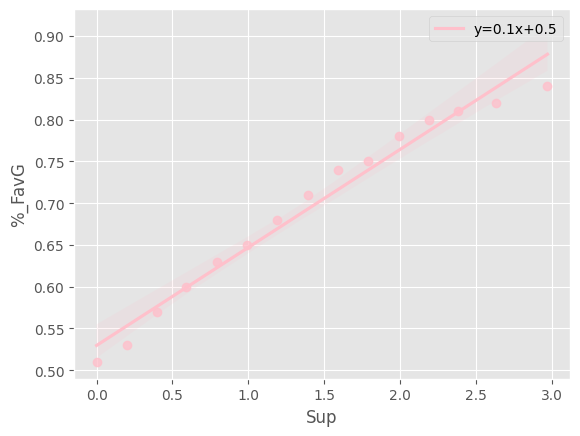

In [35]:
# Now lets plot the % split vs Sup for all matches
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb2['Sup'],dfcomb2['%_FavG'])

# use line_kws to set line label for legend
ax = sns.regplot(x="Sup", y="%_FavG", data=dfcomb2, color='pink', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

#### Analyse the regression line

In [36]:
# Lets look at a linear regression for this relationship and calculate the characteristics
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
X = dfcomb2[['Sup']]
Y = dfcomb2[['%_FavG']]
lm.fit(X,Y)
print('The R-Square is: ', lm.score(X,Y))
print('Intercept is: ',lm.intercept_)
print('Co-efficient is ',lm.coef_)


The R-Square is:  0.9736241586798644
Intercept is:  [0.52970131]
Co-efficient is  [[0.11732955]]


#### Residual plot to observe variance of data points around the regression line

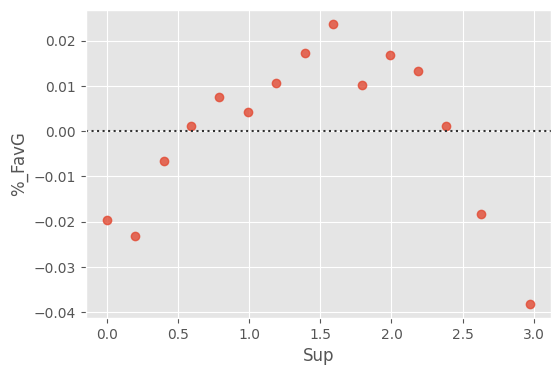

In [37]:
# from the graph the relationship does not look entirely linear. Lets check with a residual plot
width = 6
height = 4
plt.figure(figsize=(width, height))
sns.residplot(x=dfcomb2['Sup'],y=dfcomb2['%_FavG'])
plt.show()

#### Relationship looks non-linear. Explore a Polynomial relationship

In [38]:
# the distribution of data points around the regression line signifies a curved relationship is present
# Lets define a function to show the polynomial relationship through which we can parse the independent and target variables

def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,3,15)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Polynomial fit for Sup ~ %_FavGls')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('%_FavGls')
    
    plt.show()
    plt.close()
    
    

In [39]:
x = dfcomb2['Sup']
y = dfcomb2['%_FavG']


In [40]:
f = np.polyfit(x,y,4)
p = np.poly1d(f)
print(p)

          4           3           2
0.001087 x - 0.01207 x + 0.01486 x + 0.1453 x + 0.5075


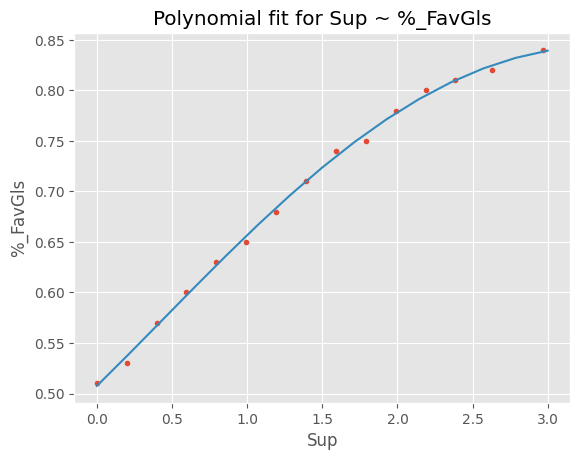

In [41]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Sup')

In [42]:
from sklearn.metrics import r2_score

r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)


The R-square value is:  0.998374231235885


In [43]:
from sklearn.metrics import mean_squared_error
mean_squared_error(dfcomb2['%_FavG'],p(x))

1.7988950733958474e-05

Conclusion:
- With an R-square of 0.998, the 3 degree polynomial regression gives a better correlation for the bucketted data than the linear regression.
- The percentage of goals scored by the favourite team in a soccer match can thus be said to follow the formula: 
   


In [44]:
print('The R-square value is: ', r_squared)

The R-square value is:  0.998374231235885


# ____________________________________________________________________________
### How does Supremacy relate to DNB price?
#### To understand how to formulate the Supremacy given the dnb price taken from match odds 1X2

In [45]:
dfcomb2

,Sup,FavG,TG,dnb_fav,%_FavG
0,2.97,3.04,3.61,0.95,0.84
1,2.63,2.94,3.57,0.93,0.82
2,2.38,2.69,3.31,0.92,0.81
3,2.19,2.57,3.22,0.91,0.80
4,1.99,2.39,3.07,0.89,0.78
5,1.79,2.29,3.04,0.87,0.75
6,1.59,2.20,2.99,0.85,0.74
7,1.39,2.02,2.85,0.82,0.71
8,1.19,1.87,2.75,0.79,0.68
9,0.99,1.76,2.70,0.75,0.65


#### Visualize the relationship between dnb% and Sup

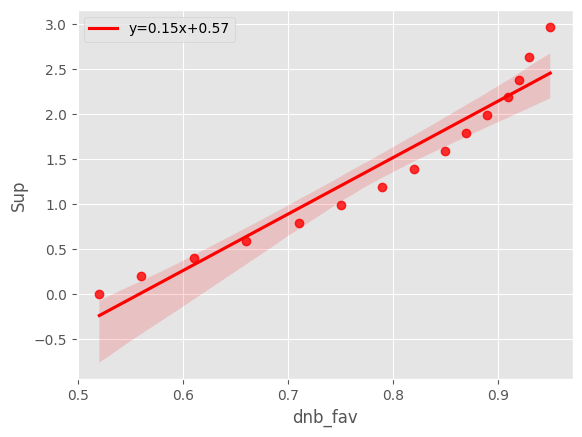

In [46]:
slope, intercept, r_value, p_value, std_err = stats.linregress(dfcomb2['Sup'],dfcomb2['dnb_fav'])

# use line_kws to set line label for legend
ax = sns.regplot(x="dnb_fav", y="Sup", data=dfcomb2, color='r', 
 line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

# plot legend
ax.legend()

plt.show()

In [47]:
lm = LinearRegression()
X = dfcomb2[['Sup']]
Y = dfcomb2[['dnb_fav']]
lm.fit(X,Y)
print('The R-Square is: ', lm.score(X,Y))
print('Intercept is: ',lm.intercept_)
print('Co-efficient is ',lm.coef_)

The R-Square is:  0.9349771783529168
Intercept is:  [0.57281159]
Co-efficient is  [[0.14925681]]


#### Again clearly non-linear. Run it through a polynomial 4 degree regression

In [48]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0.5,1)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('Polynomial fit for Sup ~ dnb_fav')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Sup')
    
    plt.show()
    plt.close()

In [49]:
x = dfcomb2['dnb_fav']
y = dfcomb2['Sup']

In [50]:
f = np.polyfit(x,y,4)  # 4 degree polynomial found by trial and error
p = np.poly1d(f)
print(p)

       4         3         2
164.8 x - 428.9 x + 415.9 x - 173.9 x + 26.24


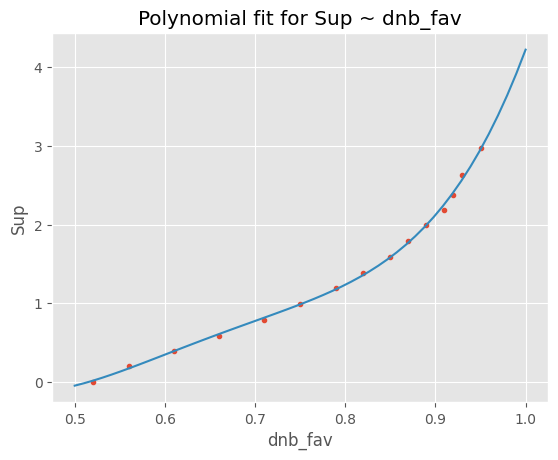

In [51]:
# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'dnb_fav')

#### Clearly a much better fit. Evaluate the fit...

In [52]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.9989316222195093


#### Conclusion:
> The best formula predicor of Exp Sup (where x = dnb_fav%) is:


In [53]:
print(p)

       4         3         2
164.8 x - 428.9 x + 415.9 x - 173.9 x + 26.24
